In [32]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib

In [4]:
s = 1 # seed
a = 4 # multiplier
c = 1 # increment
m = 5 # modulus

n = 60
x = np.zeros(n)
x[0] = s
for i in range(1,n):
    x[i] = (a * x[i-1] + c) % m

In [5]:
x

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [11]:
vals = [[0, 0, 1],
        [0, np.pi/2, 1],
        [0.7, np.pi/8, 0.3],
        [0.6, 0.4, 1]]

counter = 0
for i in vals:
    test = True
    
    if (0 > i[0] or 1 < i[0]):
        test = False
    if (0 > i[1] or 1 < i[1]):
        test = False
    if (0 > i[2] or 1 < i[2]):
        test = False
        
    if (i[0]**2 + np.sin(i[1]) > i[2]):
        test = False
        
    if (i[0] - i[2] + np.exp(i[1]) > 1):
        test = False
        
    if (test == True):
        counter += 1

counter

1

In [12]:
1000 * np.sqrt(1000)

31622.776601683792

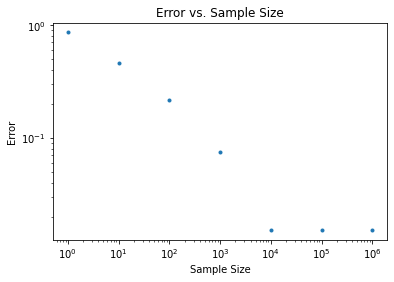

In [31]:
# HW7.9. Calculating pi using Monte Carlo

size = 10000

xs = np.random.rand(size)
ys = np.random.rand(size)

# Part 1
def calculate_pi(x_s, y_s): # CORRECT
    in_circle = 0
    for i in range(len(x_s)):
        if (x_s[i]**2 + y_s[i]**2 <= 1):
            in_circle += 1
        
    return 4 * in_circle / len(x_s)

# Part 2
pi = np.zeros(7)
for i in range(7):
    pi[i] = calculate_pi(xs[:10**i], ys[:10**i])
    
# Part 3
samples = np.array([1, 10, 100, 1000, 10000, 100000, 1000000])

plt.loglog(samples, np.abs(pi - np.pi), '.')
plt.title('Error vs. Sample Size')
plt.ylabel('Error')
plt.xlabel('Sample Size')

plot = plt

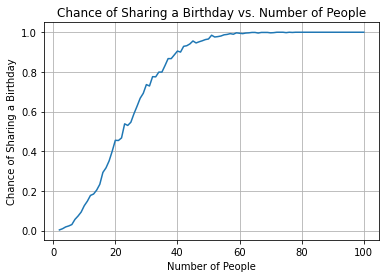

23

In [53]:
# HW7.10. The Birthday Problem

def genroom(n):
    return np.random.randint(1, 366, n)

def has_duplicates(arr):
    arr_list = arr.tolist()
    
    seen = set()
    
    for num in arr_list:
        if num in seen:
            return 1
        seen.add(num)
    return 0

def duplicate_birthdays(n):
    repeats = 0
    for i in range(1000):
        repeats += has_duplicates(genroom(n))

    return repeats

# Part 1
prob_n = np.zeros([99])
for n in range(2, 101):
    prob_n[n-2] = duplicate_birthdays(n) / 1000

# Part 2
perc_50 = 2
while (prob_n[perc_50-2] < 0.5):
    perc_50 += 1

# Part 3
people = np.arange(2, 101)

plt.plot(people, prob_n)
plt.title('Chance of Sharing a Birthday vs. Number of People')
plt.ylabel('Chance of Sharing a Birthday')
plt.xlabel('Number of People')
plt.grid()
plt.show()
# Plot prob_n

perc_50

In [69]:
# HW7.11. Calculating a Volume of Intersection

r = 1

# Part 1
def insideCylinders(pos,r):
    if (pos[1]**2 + pos[2]**2 > r**2):
        return False
    if (pos[0]**2 + pos[1]**2 > r**2):
        return False
    return True

# Part 2
def prob_inside_volume(N,r):
    counter = 0
    for i in range(N):
        x = np.random.random()*2*r - r
        y = np.random.random()*2*r - r
        z = np.random.random()*2*r - r
        position = np.array([x, y, z])
        if (insideCylinders(position, r) == True):
            counter += 1
    return counter / N


# Part 3
N = 1000
r = 1
volume_approx = prob_inside_volume(N, r) * 8 * r**3

volume_approx

5.384

In [70]:
16/3 * r**3

5.333333333333333